# Proyek UAS PMDPM

<b>Harap jangan menghapus cell dan komentar yang diberikan!</b>

Setiap cell markdown dan code akan berisi instruksi pengerjaan Proyek UAS PMDPM

Dalam notebook ini Anda akan diminta untuk membuat sebuah proyek Pembelajaran Mesin menggunakan dataset yang sudah disediakan. Proyek akan terdiri dari proses inisialisasi, data loading, data cleansing, feature engineering, modelling dan evaluasi model. Pada bagian akhir silahkan berikan laporan singkat dari proyek yang sudah dikerjakan

## Penjelasan Tugas

Terapkan pemrosesan dataset dari loading, data cleansing (jika perlu), data scaling, feature selection, hingga evaluasi model secara sederhana menggunakan code yang sudah dipelajari dalam latihan-latihan dan tugas.

### Inisialisasi

Bagian berikut berisi import library yang dibutuhkan

### Data Loading

Bagian berikut berisi proses data loading (boleh dengan file upload atau dengan mount drive), jangan lupa tampilkan 20 baris data teratas!

In [87]:
#loading data yang akan diolah

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectPercentile
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC

df_paris = pd.read_csv('paris_housing2000.csv')
df_paris.head(20)

,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,3,4,1995,N,Y,3114,1258,264,Y,9,10313.5,Basic
1,9,1,2011,N,Y,9390,6219,922,N,9,13229.1,Basic
2,1,4,2003,Y,N,2239,2795,951,Y,7,14431.3,Basic
3,6,2,1990,N,N,6861,5769,442,N,5,15488.0,Basic
4,6,9,1992,Y,Y,6618,7045,939,Y,10,16799.2,Basic
5,5,2,2010,Y,N,4426,5336,911,N,4,17071.0,Basic
6,4,3,1990,Y,N,6022,8521,391,Y,3,17363.0,Basic
7,6,3,2000,N,N,2325,6230,536,N,9,18985.0,Basic
8,2,2,2020,N,Y,8598,3119,268,N,10,19638.0,Basic
9,7,6,1995,N,Y,2675,6452,724,Y,2,19788.5,Basic


In [88]:
#bersihkan dataset menggunakan metode yang sudah dipelajari

missing_values = df_paris.isnull().sum().sort_values(ascending=False)
missing_values.head(20)

df_paris.drop(['cityPartRange'], axis=1, inplace=True)
df_paris.drop(['price'], axis=1, inplace=True)

df_paris.head(20)

,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,category
0,4,1995,N,Y,3114,1258,264,Y,9,Basic
1,1,2011,N,Y,9390,6219,922,N,9,Basic
2,4,2003,Y,N,2239,2795,951,Y,7,Basic
3,2,1990,N,N,6861,5769,442,N,5,Basic
4,9,1992,Y,Y,6618,7045,939,Y,10,Basic
5,2,2010,Y,N,4426,5336,911,N,4,Basic
6,3,1990,Y,N,6022,8521,391,Y,3,Basic
7,3,2000,N,N,2325,6230,536,N,9,Basic
8,2,2020,N,Y,8598,3119,268,N,10,Basic
9,6,1995,N,Y,2675,6452,724,Y,2,Basic


### Data Visualization

Dalam proses visualisasi data, silahkan visualisasikan feature menggunakan plot yang sesuai agar mendapat insight dari data dengan menjawab pertanyaan-pertanyaan berikut:

    untuk sub A:
    1. Bagaimana perbandingan median luas basement rumah berdasarkan tipe rumahnya (Basic dan Luxury)?
    2. Bagaimana komposisi jumlah rumah yang baru dibangun atau tidak pada tipe rumah Luxury?
   

    untuk sub B:
    1. Bagaimana perbandingan median luas loteng rumah berdasarkan tipe rumahnya (Basic dan Luxury)
    2. Bagaimana komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic?
   

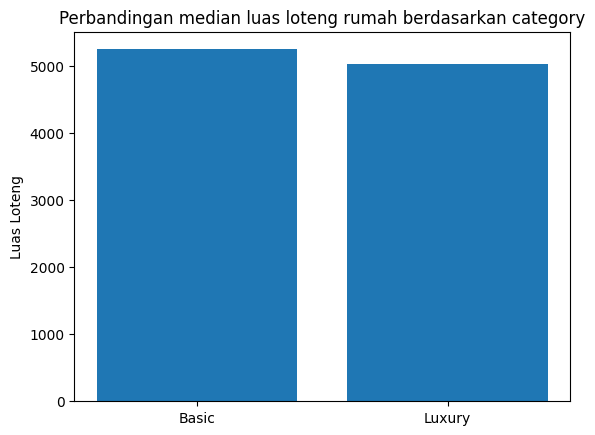

Median luas loteng rumah Basic:  5243.0
Median luas loteng rumah Luxury:  5023.0


In [89]:
#visualisasi fitur menggunakan metode yang sudah dipelajari

#1
# plt.boxplot([df_paris[df_paris['category'] == 'Basic']['attic'], df_paris[df_paris['category'] == 'Luxury']['attic']], labels=['Basic', 'Luxury'])
# plt.title('Perbandingan median luas loteng rumah berdasarkan category')
# plt.ylabel('Luas Loteng')
# plt.show()

Basic = df_paris[df_paris['category'] == 'Basic']['attic']
Luxury = df_paris[df_paris['category'] == 'Luxury']['attic']

median_Basic = df_paris[df_paris['category'] == 'Basic']['attic'].median()
median_Luxury = df_paris[df_paris['category'] == 'Luxury']['attic'].median()

# median_Basic = np.median(Basic)
# median_Luxury = np.median(Luxury)

Category = ['Basic', 'Luxury']
median = [median_Basic, median_Luxury]

plt.bar(Category, median)
plt.title('Perbandingan median luas loteng rumah berdasarkan category')
plt.ylabel('Luas Loteng')
plt.show()

print('Median luas loteng rumah Basic: ', median_Basic)
print('Median luas loteng rumah Luxury: ', median_Luxury)

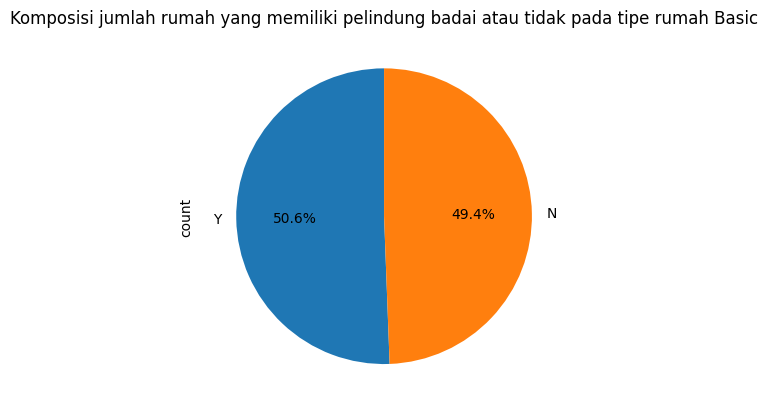

In [90]:
#visualisasi fitur menggunakan metode yang sudah dipelajari

#2. komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic

# data = pd.DataFrame(df_paris["hasStormProtector"].value_counts())

# fig, ax = plt.subplots()
# ax.pie(data.values, labels = ["N", "Y"], hole = 0.35, autopct = "%1.1f%%", shadow = True, startangle = 90)
# ax.set_title("Komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic")
# ax.axis("equal")
# fig = plt.pie(data, values = "hasStormProtector", names = ["N", "Y"], hole = 0.35, opacity = 0.8, labels = {"label" :"Has Storm Protector","hasStormProtector":"Jumlah"})
# fig.update_layout(title = dict(text = "Komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic"))
# fig.update_traces(textposition = "outside", textinfo = "percent+label")
# fig.show()

df_paris[df_paris['category'] == 'Basic']['hasStormProtector'].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Komposisi jumlah rumah yang memiliki pelindung badai atau tidak pada tipe rumah Basic')
plt.show()

### Deskripsi Data Visualization
Berikan keterangan atau deskripsi singkat mengenai informasi yang diperoleh dari visualisasi data tersebut. Jawablah pertanyaan di atas pada cell markdown ini!

### Data Cleansing

Bagian berikut berisi proses pembersihan data (jika diperlukan, minimal cek apakah ada data yang kosong atau duplikat). Drop feature yang berlaku sebagai unique identifier (CityCode) dan drop feature Price. Lakukan OneHotEncoder untuk data kategorik string. Pisahkan juga label dengan feature!

### Train-test split

> Untuk sub A: random_state train_test_split gunakan 2 digit terakhir NPM terbesar di sub kelompok  

> Untuk sub B: random_state train_test_split gunakan 2 digit terakhir NPM terkecil di sub kelompok 

In [91]:
#train-test split dan data scaling

from sklearn.model_selection import train_test_split

X = df_paris.drop('category',axis=1)
y = df_paris['category']

#210711407 (Alexis)
#190710177 (Steven)
#Karena dua digit terakhir NPM terkecil adalah 07, maka akan digunakan random_state=7 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=7)

print(X_train.shape)
print(X_test.shape)

(1500, 9)
(500, 9)


In [92]:
# One Hot Encoding

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

cat_cols = ['isNewBuilt', 'hasStormProtector', 'hasStorageRoom']

transformer = make_column_transformer(
    (OneHotEncoder(), cat_cols), 
    remainder='passthrough')

X_train_enc = transformer.fit_transform(X_train)
X_test_enc = transformer.transform(X_test)

print(X_train_enc.shape)
print(transformer.get_feature_names_out())

(1500, 12)
['onehotencoder__isNewBuilt_N' 'onehotencoder__isNewBuilt_Y'
 'onehotencoder__hasStormProtector_N' 'onehotencoder__hasStormProtector_Y'
 'onehotencoder__hasStorageRoom_N' 'onehotencoder__hasStorageRoom_Y'
 'remainder__numPrevOwners' 'remainder__made' 'remainder__basement'
 'remainder__attic' 'remainder__garage' 'remainder__hasGuestRoom']


### Modelling

Gunakan Pipeline untuk modelling dan grid search cross-validation untuk pemilihan model terbaik. Gunakan Stratified K-fold Cross Validation dengan nilai n_splits=5. Pipeline terdiri atas data scaling, feature selection, dan classifier. Buatlah 2 Pipeline dan 2 GridSearchCV untuk masing-masing kombinasi berikut.

>Step data scaling untuk membandingkan perlunya data scaling atau tidak. Gunakan dua nilai pada parameter grid yaitu: [None,Scaler]. Untuk sub A: gunakan StandardScaler. Untuk sub B: gunakan MinMaxScaler

>Step feature selection untuk membandingkan metode feature selection yang digunakan. Gunakan dua metode pada parameter grid yaitu: [None,Selector]. Untuk sub A: gunakan SelectKBest dengan ketentuan k minimal 2, maksimal n-1. Untuk sub B: gunakan SelectPercentile dengan ketentuan persentil minimal 30%, maksimal 80%. Kalian juga perlu melakukan setting parameter grid nilai k atau percentile-nya.

>Step classifier untuk membandingkan algoritme classifier. Eksplorasi pengaturan parameter yang ada pada algoritme yang akan Anda gunakan, tidak terbatas pada 1-2 parameter saja supaya optimal (selain random_state). Silahkan bereksperimen untuk parameter seperti n_estimators, max_depth untuk tree-based classifier; C untuk Logistic Regression; dan C, gamma, serta kernel untuk SVM agar mendapat akurasi terbaik.

> Sub A: RandomForestClassifier(n_estimators=bebas minimal 50, random_state= dua digit terakhir NPM terbesar dalam sub kelompok, max_depth=bebas, criterion='entropy') dan LogisticRegression(C=bebas, max_iter=10000, class_weight='balanced')

> Sub B: K-Nearest Neighbors(n_neighbors=bebas, weights='distance') dan SVC(C=bebas, gamma=bebas, class_weight='balanced')

>Tampilkan best estimator dan nilai best score dari kedua grid-search cross-validation. Fit best estimator pada train set kemudian ujikan pada test set dengan fungsi score. Format score 3 digit di belakang koma (.3f).

In [104]:
#cell code ini untuk proses pembuatan model pipeline & grid search 1

skfold = StratifiedKFold(n_splits=5)
pipeline = Pipeline([
    ('data_scaling',MinMaxScaler()),
    ('feat_select',SelectPercentile()),
    ('clf',KNeighborsClassifier(n_neighbors=5, weights='distance'))
])

params_grid = {'data_scaling': [None, MinMaxScaler()],
               'feat_select': [None, SelectPercentile(percentile=50)],
               'clf__n_neighbors': [1, 5, 10, 15, 20],}

GSCV = GridSearchCV(pipeline, params_grid, cv=skfold, n_jobs=-1)
GSCV.fit(X_train_enc,y_train)

print("Best params: {}".format(GSCV.best_params_))
print("Best CV score: {:.3f}".format(GSCV.best_score_))
print("Test set score: {:.3f}".format(GSCV.score(X_test_enc,y_test)))
print("Best estimator:\n{}".format(GSCV.best_estimator_))

Best params: {'clf__n_neighbors': 20, 'data_scaling': MinMaxScaler(), 'feat_select': None}
Best CV score: 0.778
Test set score: 0.780
Best estimator:
Pipeline(steps=[('data_scaling', MinMaxScaler()), ('feat_select', None),
                ('clf',
                 KNeighborsClassifier(n_neighbors=20, weights='distance'))])


In [ ]:
#cell code ini untuk proses pembuatan model pipeline & grid search 2

skfold = StratifiedKFold(n_splits=5)
pipeline = Pipeline([
    ('data_scaling',MinMaxScaler()),
    ('feat_select',SelectPercentile()),
    ('clf',SVC(C=5, gamma=0.1, class_weight='balanced'))
])

params_grid = {'data_scaling': [None, MinMaxScaler()],
               'feat_select': [None, SelectPercentile(percentile=50)],
               'clf__C': [0.1, 1, 5, 10, 20],}

GSCV = GridSearchCV(pipeline, params_grid, cv=skfold, n_jobs=-1)
GSCV.fit(X_train_enc,y_train)

print("Best params: {}".format(GSCV.best_params_))
print("Best CV score: {:.3f}".format(GSCV.best_score_))
print("Test set score: {:.3f}".format(GSCV.score(X_test_enc,y_test)))
print("Best estimator:\n{}".format(GSCV.best_estimator_))

### Evaluasi Model

Bagian berikut berisi evaluasi model menggunakan classification report dan skor AUC. Tampilkan classification report dan AUC dari best estimator yang diperoleh masing-masing grid search!

In [ ]:
#lakukan proses evaluasi model algoritme pembelajaran mesin


## Kesimpulan

Silahkan jawab pertanyaan berikut:

1. Apa saja feature-feature yang penting untuk membedakan antara rumah basic dan luxury? 

2. Model apakah yang memiliki performa paling baik terhadap dataset? Apakah parameter setting yang paling optimal dari model tersebut?

*tulis jawaban Anda di cell ini*